# Forecast Future Market Trends (ARIMA)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os

# Ensure 'figs' directory exists for saving plots
os.makedirs('../figs', exist_ok=True)

print("Libraries imported successfully!")

Libraries imported successfully!


## Load and Prepare Data

In [3]:
# Load the saved adjusted close data from Task 1
adj_close = pd.read_csv('../data/raw/adj_close.csv', index_col='Date', parse_dates=True)

# Extract TSLA data
tsla_data = adj_close['TSLA'].dropna()

print(f"TSLA data loaded: {len(tsla_data)} rows")
print(tsla_data.tail())

TSLA data loaded: 2535 rows
Date
2025-01-24    71.592484
2025-01-27    71.970116
2025-01-28    71.930367
2025-01-29    71.890610
2025-01-30    71.989998
Name: TSLA, dtype: float64


## Train the ARIMA Model

In [4]:
# Refit ARIMA(1,1,1) on the full TSLA dataset
arima_fit = SARIMAX(tsla_data, order=(1, 1, 1)).fit(maxiter=50, disp=False)

print("ARIMA(1,1,1) model fitted successfully!")
print(arima_fit.summary())

/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,1) model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                 2535
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  24.640
Date:                Sat, 08 Mar 2025   AIC                            -43.280
Time:                        18:48:46   BIC                            -25.768
Sample:                             0   HQIC                           -36.927
                               - 2535                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6147      0.102      6.023      0.000       0.415       0.815
ma.L1         -0.6519      0.101     -6.470      0.000      -0.849      -0.454
sigma2      

## Generate Forecast

In [5]:
# Forecast 12 months (252 trading days)
forecast_steps = 252
forecast_object = arima_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast_object.predicted_mean
confidence_intervals = forecast_object.conf_int(alpha=0.05)  # 95% confidence intervals

# Generate future dates
last_date = tsla_data.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='B')[1:]  # Business days

# Combine forecast into a DataFrame
forecast_df = pd.DataFrame({
    'Forecast': forecast_mean,
    'Lower CI': confidence_intervals['lower TSLA'],
    'Upper CI': confidence_intervals['upper TSLA']
}, index=future_dates)

print("Forecast generated for 252 days ahead:")
print(forecast_df.head())

Forecast generated for 252 days ahead:
            Forecast  Lower CI  Upper CI
2025-01-31       NaN       NaN       NaN
2025-02-03       NaN       NaN       NaN
2025-02-04       NaN       NaN       NaN
2025-02-05       NaN       NaN       NaN
2025-02-06       NaN       NaN       NaN


/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Visualize Forecast

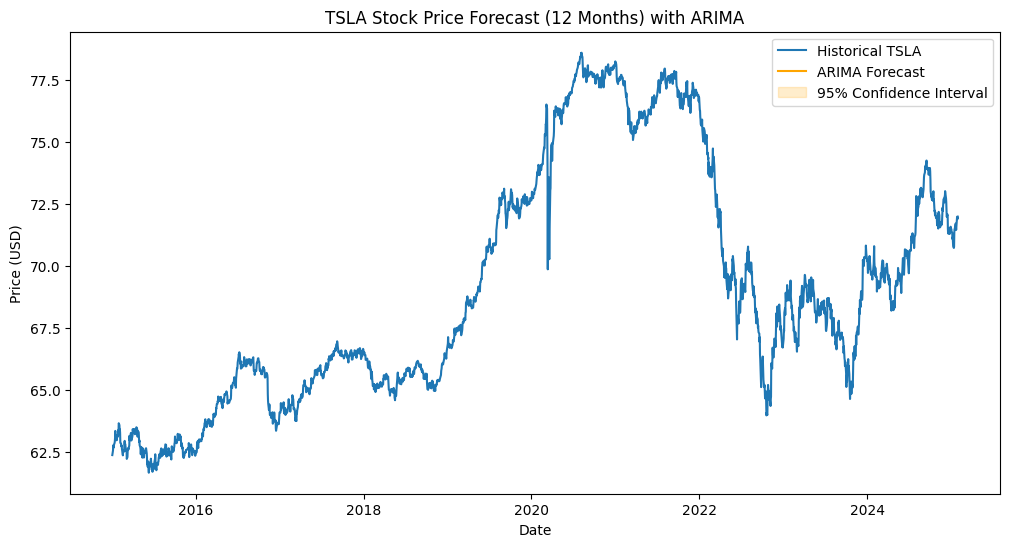

In [6]:
# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(tsla_data, label='Historical TSLA')
plt.plot(forecast_df['Forecast'], label='ARIMA Forecast', color='orange')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], 
                 color='orange', alpha=0.2, label='95% Confidence Interval')
plt.title('TSLA Stock Price Forecast (12 Months) with ARIMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.savefig('../figs/arima_forecast_12months.png')
plt.show()